# 1 Load the required modules

In [1]:
## WARNING: Use tensorflow version >= 2.x.x
# Basic libraries
import numpy as np
# Neural network's components
from keras.preprocessing.image import ImageDataGenerator # Used to stream images
import keras
from tensorflow.keras.models import Sequential, Model # Basic commands for neural networks building
from tensorflow.keras.layers import Dense, Dropout, Flatten # Neurons layers
from tensorflow.keras.layers import Conv2D, MaxPool2D # Convolutional layers
from tensorflow.keras import backend as K # Keras backed to de-allocate memory
from tensorflow.keras.optimizers import Adam # Optimizer for neural networks
import matplotlib.pyplot as plt

# Configurations
%run my_utils.ipynb

Using TensorFlow backend.


# 2 MultiLayer Perceptron Neural Network

In [2]:
def build_mlp(neurons=[64, 64, 128], num_classes=2, lr=1e-5, input_shape=(256, 256, 3)):
    model = Sequential()
    
    # Input layer
    model.add(Flatten(input_shape = input_shape))
    
    # for each of the next hidden layers
    for layer_neurons in neurons:
        model.add(Dense(layer_neurons, activation = 'relu'))
        model.add(Dropout(0.5))
    
    # output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # Add the optimizer
    optimizer = Adam(lr = lr)
    model.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])
    
    return model

# 3 Convolutional Neural Network

In [3]:
def build_cnn(input_shape=(244, 244, 3), num_classes=2, lr=1e-5, filters=[64, 64], neurons=[128]):
    
    model = Sequential()
    
    # First convolutional layer
    # filters[0]=64 filters used for the convolutions
    # "Kernel size" is filter's size which is chosen to be 5x5
    # "padding='Same'" means that in case that an image is not of given dimensions
    #                  it is filled with its outer pixels until it will
    #                  be of given dimensions
    # "input_shape" of the input layer is the images' dimensions
    # "activation='relu'" is the function max(0, x)
    model.add(Conv2D(filters[0], kernel_size = (5,5),\
                     padding = 'Same', input_shape = input_shape,\
                     activation = 'relu'))
    # Command below checks the 5 neighbor pixels of the pixel we examine
    # this meaning it checks the upper, lower, left and right pixels
    model.add(MaxPool2D(pool_size = (5,5)))
    # Command below drops the 25% of the information that is produced
    # on this layer, to avoid over-fitting
    model.add(Dropout(0.25))
    
    # Second and later convolutional layers
    for i in range(2, len(filters)+1):
        model.add(Conv2D(filters[i-1], kernel_size=(5,5),\
                         padding = 'Same', activation = 'relu'))
        model.add(MaxPool2D(pool_size = (5,5)))
        model.add(Dropout(0.25))
    
    # The model so far outputs 3D feature maps (height, width, features)
    
    # An MLP to produce the output
    model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
    for layer_neurons in neurons:
        model.add(Dense(layer_neurons, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    
    model.summary()
    
    optimizer = Adam(lr = lr)
    
    model.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])
    
    return model

# 4 Run the models


Insert:
	1 - To evaluate a MultiLayer Perceptron NN
	2 - To evaluate a Convolutional NN
	3 - To evaluate a Stochastic Gradient Descent
	4 - To evaluate a Support Vector Machine
	0 - To Exit
Choice: 1
Found 9233 images belonging to 2 classes.
Found 1283 images belonging to 2 classes.
Start training process for the MLP model...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 144 steps, validate for 20 steps
Epoch 1/200
144/144 [==============================] - 202s 1s/step - loss: 0.8036 - accuracy: 0.5384 - val_loss: 0.6659 - val_accuracy: 0.5719
Epoch 2/200
144/144 [==============================] - 153s 1s/step - loss: 0.6520 - accuracy: 0.5867 - val_loss: 0.6332 - val_accuracy: 0.5703
Epoch 3/200
144/144 [==============================] - 174s 1s/step - loss: 0.6395 - accuracy: 0.6053 - val_loss: 0.6159 - val_accuracy: 0.6602
Epoch 4/200
144/144 [==============================] - 201s 1s/step - loss: 0.6249 - accuracy: 0.6489 - val_loss: 0.6002 - val_accuracy: 0.6672
Ep

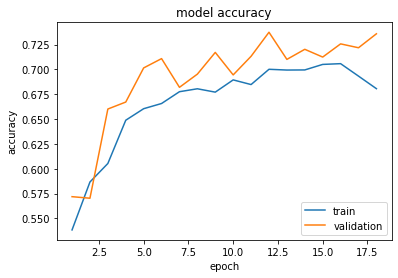

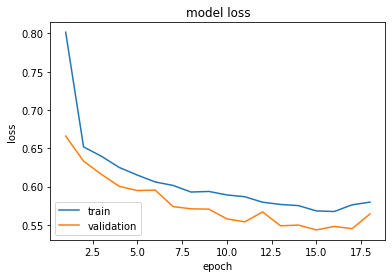



                     true_benign  true_malignant
predicted_benign             987             157
predicted_malignant          505            1022


             precision    recall  f1-score support
benign        0.862762  0.661528  0.748862    1492
malignant     0.669286  0.866836  0.755358    1179
accuracy            NA        NA  0.752153    2671
macro avg     0.766024  0.764182   0.75211    2671
weighted avg   0.77736  0.752153   0.75173    2671

Insert:
	1 - To evaluate a MultiLayer Perceptron NN
	2 - To evaluate a Convolutional NN
	3 - To evaluate a Stochastic Gradient Descent
	4 - To evaluate a Support Vector Machine
	0 - To Exit
Choice: 2
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 51, 51, 32)        0

144/144 [==============================] - 1022s 7s/step - loss: 0.4207 - accuracy: 0.7904 - val_loss: 0.4630 - val_accuracy: 0.7727
Epoch 38/200
144/144 [==============================] - 995s 7s/step - loss: 0.4213 - accuracy: 0.7893 - val_loss: 0.4747 - val_accuracy: 0.7719
Epoch 39/200
144/144 [==============================] - 977s 7s/step - loss: 0.4195 - accuracy: 0.7885 - val_loss: 0.4712 - val_accuracy: 0.7727
Epoch 40/200
144/144 [==============================] - 960s 7s/step - loss: 0.4180 - accuracy: 0.7898 - val_loss: 0.4735 - val_accuracy: 0.7703
CNN model training process was successful!
Start evaluating the CNN model over validation set...
  ...
    to  
  ['...']
20/20 [==============================] - 38s 2s/step - loss: 0.4735 - accuracy: 0.7703
CNN model was evaluated on validation set successfully!
Start evaluating the CNN model on test set...
Found 2671 images belonging to 1 classes.
2671/2671 [==============================] - 92s 34ms/step
CNN model was evalua

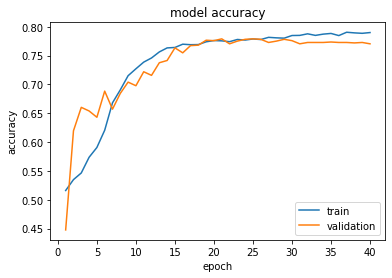

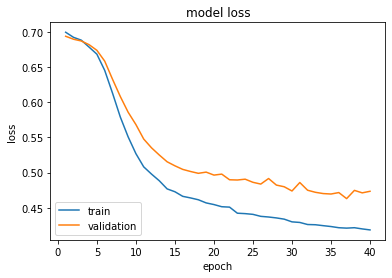



                     true_benign  true_malignant
predicted_benign             987              66
predicted_malignant          505            1113


             precision    recall  f1-score support
benign        0.937322  0.661528  0.775639    1492
malignant     0.687886   0.94402  0.795853    1179
accuracy            NA        NA  0.786222    2671
macro avg     0.812604  0.802774  0.785746    2671
weighted avg  0.827219  0.786222  0.784561    2671

Insert:
	1 - To evaluate a MultiLayer Perceptron NN
	2 - To evaluate a Convolutional NN
	3 - To evaluate a Stochastic Gradient Descent
	4 - To evaluate a Support Vector Machine
	0 - To Exit
Choice: 3
Found 9233 images belonging to 2 classes.
Found 1283 images belonging to 2 classes.
Start training process for the SGD model...
Epoch 1/5 (254.55 seconds)
Epoch 2/5 (230.58 seconds)
Epoch 3/5 (250.93 seconds)
Epoch 4/5 (243.47 seconds)
Epoch 5/5 (236.29 seconds)
Training process for the SGD model was sucessful!
Start evaluating the SGD mode

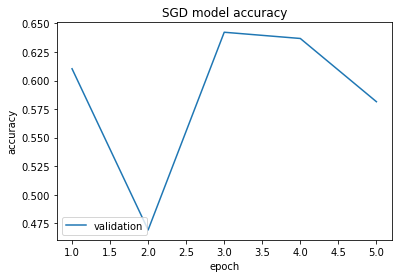



                     true_benign  true_malignant
predicted_benign            1432            1069
predicted_malignant           60             110


             precision     recall  f1-score support
benign        0.572571   0.959786  0.717255    1492
malignant     0.647059  0.0932994  0.163084    1179
accuracy            NA         NA  0.577312    2671
macro avg     0.609815   0.526542  0.440169    2671
weighted avg   0.60545   0.577312   0.47264    2671

Insert:
	1 - To evaluate a MultiLayer Perceptron NN
	2 - To evaluate a Convolutional NN
	3 - To evaluate a Stochastic Gradient Descent
	4 - To evaluate a Support Vector Machine
	0 - To Exit
Choice: 4
Found 9233 images belonging to 2 classes.
Found 1283 images belonging to 2 classes.
Start training process for the SVM model...
Epoch 1/5 (963.83 seconds)
Epoch 2/5 (870.30 seconds)
Epoch 3/5 (718.69 seconds)
Epoch 4/5 (268.09 seconds)
Epoch 5/5 (221.88 seconds)
Training process for the SVM model was sucessful!
Start evaluating the SV

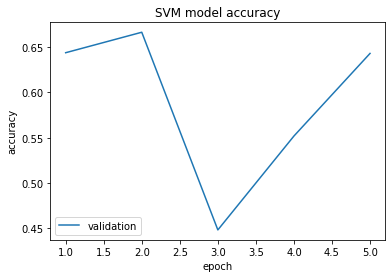



                     true_benign  true_malignant
predicted_benign             663             122
predicted_malignant          829            1057


             precision    recall  f1-score support
benign        0.844586   0.44437  0.582345    1492
malignant     0.560445  0.896522  0.689723    1179
accuracy            NA        NA  0.643954    2671
macro avg     0.702516  0.670446  0.636034    2671
weighted avg  0.719164  0.643954  0.629742    2671

Insert:
	1 - To evaluate a MultiLayer Perceptron NN
	2 - To evaluate a Convolutional NN
	3 - To evaluate a Stochastic Gradient Descent
	4 - To evaluate a Support Vector Machine
	0 - To Exit
Choice: 0


SystemExit: 

D:\Users\astar\anaconda3\envs\t\lib\site-packages\IPython\core\interactiveshell.py:3425: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
if __name__ == '__main__':    
    if int(tf_version().split('.')[0]) < 2:
        raise Exception('Tensorflow version must be at least 2.x.x! Please update!')

    batch_size = 64 # Amount of elements that feeded together to the model for processing
    rescale_factor = 1./255
    lr = 1e-5 # Initial learning rate
    num_classes = 2 # Number of classes to classify to
    y_actual, _ = y_actual_labels() # Get the actual label for the test set

    #menu for running the models, initializing the number of epochs
    choice = -1
    while choice != 0:
        choice = int(input('\nInsert:'                           '\n\t1 - To evaluate a MultiLayer Perceptron NN'                           '\n\t2 - To evaluate a Convolutional NN'                           '\n\t3 - To evaluate a Stochastic Gradient Descent'                '\n\t4 - To evaluate a Support Vector Machine'                  '\n\t0 - To Exit'                           '\nChoice: '))

        epochs = 1
        name = ''

        if choice == 0:
            raise SystemExit()
        elif choice == 1:
            model = build_mlp(neurons = [512, 512], num_classes = num_classes, lr = lr)
            epochs = 200
            name = 'MLP'
        elif choice == 2:
            model = build_cnn(input_shape = (256, 256, 3), num_classes = num_classes,
                              lr = lr, filters = [32, 32, 32], neurons = [512])
            epochs = 200
            name = 'CNN'
        elif choice == 3:
            epochs = 5
            name = 'SGD'
        elif choice == 4:
            epochs = 5
            name = 'SVM'
        else:
            print('Invalid choice!\n')
            continue
            
        if choice in [1, 2]:
            result = run_nn(model, epochs = epochs, batch_size = batch_size, rescale_factor = rescale_factor, name = name)

            print(name + ' model evaluated in train set with',
                  ' and '.join([i + ' = ' + str(j) for i, j in result['metrics'].items()]))
            #print accuracy-loss plot
            for what in ['accuracy', 'loss']:
                where = 'lower right'

                if what == 'loss':
                    where = 'lower left'

                plot_model(result['history'].history[what], result['history'].history['val_' + what],
                                 what, where)
                
                

            
        elif choice in [3, 4]:
            
            result = run_not_nn(epochs = epochs, batch_size = batch_size, alpha = lr, rescale_factor = rescale_factor, name = name)
            
            get_ipython().run_line_magic('matplotlib', 'inline')
            import matplotlib.pyplot as plt
           
            plt.plot([x+1 for x in range(epochs)], result['history'])
            plt.title(name+ ' model accuracy')
            
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['validation'], loc='lower left')
            plt.show()
            
            
        #print confusion matrix
        print('\n')
        print(confusion_matrix(y_actual, result['predictions']))

        #print classification metrics 
        print('\n')
        print(classification_report(y_actual, result['predictions']))
        
